<a href="https://colab.research.google.com/github/sandheepgopinath/Code-Repository/blob/main/AutoEncoder_for_different_latent_number_of_latent_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto Encoder

In [1]:
def print_distributions(number_of_neurons, data):
  import matplotlib.pyplot as plt
  import seaborn as sns
  
  plt.figure(figsize=(20,20))

  for i in range(number_of_neurons):
    plt.subplot(8,number_of_neurons//8,i+1)
    sns.histplot(data[i])
    
def print_decoder_outputs(input,predictions,number):
  import matplotlib.pyplot as plt
  plt.figure(figsize=(10,3))
  for i in range(number):
    plt.subplot(1,number,i+1)
    plt.axis='off'
    plt.imshow(input[i].reshape(28,28),cmap='gray')
  plt.figure(figsize=(10,3))
  for i in range(number):
    plt.subplot(1,number,i+1)
    plt.axis='off'
    plt.imshow(predictions[i].reshape(28,28),cmap='gray')




In [2]:
# The motive here is to create an autoencoder

# We will be creating an encoder which will take as input a 32x32 flattened image and then reconstruct it
# using a single layer. 
import warnings
warnings.filterwarnings('ignore')
import keras
from keras import layers
n_dimension=32
input_image=keras.Input(shape=(784,))
encoded_image=layers.Dense(n_dimension,activation='relu')(input_image) # This layer will scale down the image to n_dimension
decoded_image=layers.Dense(784,activation='sigmoid')(encoded_image)

autoencoder_model=keras.Model(input_image,decoded_image)
autoencoder_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


#### Notes
We can see that the model takes as input a flattened image, compresses and encodes it and then reconstruct the image back in the third Dense layer. <br>
While doing the decompression, some information will be lost . 

In [3]:
# Creating model for encoding

encoder=keras.Model(input_image,encoded_image)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Creating model for decoding
encoded_input=keras.Input(shape=(n_dimension,))
decoder=keras.Model(encoded_input,autoencoder_model.layers[-1](encoded_input))
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [5]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
# Fitting the autoencoder model

autoencoder_model.compile(optimizer='adam',loss='binary_crossentropy')
encoder.compile(optimizer='adam',loss='binary_crossentropy')
decoder.compile(optimizer='adam',loss='binary_crossentropy')

In [7]:
import numpy as np
x_train = x_train/ 255.
x_test = x_test/ 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [8]:
autoencoder_model.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
235/235 [==============================] - 3s 5ms/step - loss: 0.2744 - val_loss: 0.1854
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1686 - val_loss: 0.1528
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1440 - val_loss: 0.1334
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1283 - val_loss: 0.1211
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1179 - val_loss: 0.1123
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1107 - val_loss: 0.1066
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1056 - val_loss: 0.1023
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1018 - val_loss: 0.0991
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0991 - val_loss: 0.0968
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0972 - val_loss: 0.0952

In [10]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


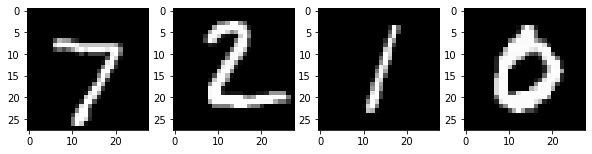

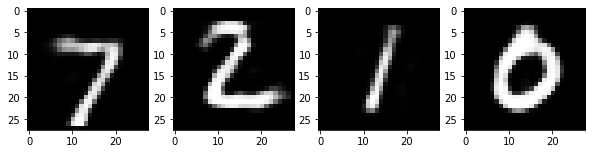

In [11]:
print_decoder_outputs(x_test,decoded_imgs,4)

#### Printing the autoencoder outputs with inputs

In [12]:
gaussian=[[] for i in range(32)] # Storing the outputs of individial neurons to different lists
for image in encoded_imgs:
  i=0
  for neuron_output in image:
    gaussian[i].append(neuron_output)
    i+=1


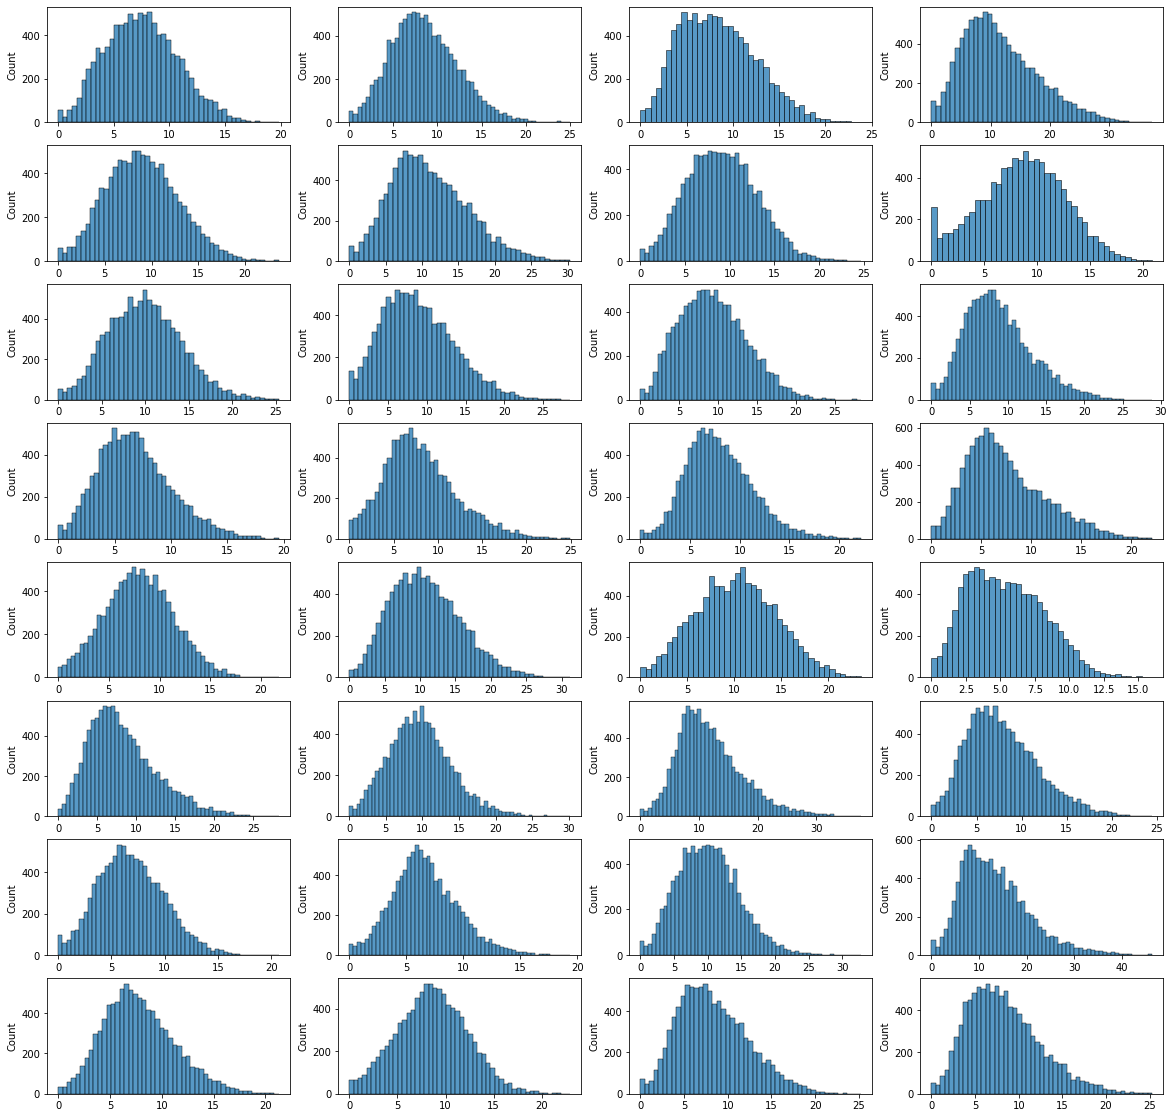

In [13]:
print_distributions(32,gaussian)

#### From the above plot we can see that for the auto encoder which is created, the distirbutions vary for each neurons. Hence it does not have a standard range of values for each neurons, which we can manually feed to generate the output. Hence ,we are creating a variational auto encoder, with standardised outputs, which will help us to feed inputs manually and generate the data

# Auto Encoder with 10 latent neurons

In [44]:
def print_distributions(number_of_neurons, data):
  import matplotlib.pyplot as plt
  import seaborn as sns
  
  plt.figure(figsize=(20,20))

  for i in range(number_of_neurons):
    plt.subplot(8,1,i+1)
    sns.histplot(data[i])
    
def print_decoder_outputs(input,predictions,number):
  import matplotlib.pyplot as plt
  plt.figure(figsize=(10,3))
  for i in range(number):
    plt.subplot(1,number,i+1)
    plt.axis='off'
    plt.imshow(input[i].reshape(28,28),cmap='gray')
  plt.figure(figsize=(10,3))
  for i in range(number):
    plt.subplot(1,number,i+1)
    plt.axis='off'
    plt.imshow(predictions[i].reshape(28,28),cmap='gray')




In [31]:
# The motive here is to create an autoencoder

# We will be creating an encoder which will take as input a 32x32 flattened image and then reconstruct it
# using a single layer. 
import warnings
warnings.filterwarnings('ignore')
import keras
from keras import layers
n_dimension=4
input_image=keras.Input(shape=(784,))
encoded_image=layers.Dense(n_dimension,activation='relu')(input_image) # This layer will scale down the image to n_dimension
decoded_image=layers.Dense(784,activation='sigmoid')(encoded_image)

autoencoder_model=keras.Model(input_image,decoded_image)
autoencoder_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 4)                 3140      
                                                                 
 dense_5 (Dense)             (None, 784)               3920      
                                                                 
Total params: 7,060
Trainable params: 7,060
Non-trainable params: 0
_________________________________________________________________


#### Notes
We can see that the model takes as input a flattened image, compresses and encodes it and then reconstruct the image back in the third Dense layer. <br>
While doing the decompression, some information will be lost . 

In [32]:
# Creating model for encoding

encoder=keras.Model(input_image,encoded_image)
encoder.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 4)                 3140      
                                                                 
Total params: 3,140
Trainable params: 3,140
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Creating model for decoding
encoded_input=keras.Input(shape=(n_dimension,))
decoder=keras.Model(encoded_input,autoencoder_model.layers[-1](encoded_input))
decoder.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_5 (Dense)             (None, 784)               3920      
                                                                 
Total params: 3,920
Trainable params: 3,920
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [34]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [35]:
# Fitting the autoencoder model

autoencoder_model.compile(optimizer='adam',loss='binary_crossentropy')
encoder.compile(optimizer='adam',loss='binary_crossentropy')
decoder.compile(optimizer='adam',loss='binary_crossentropy')

In [36]:
import numpy as np
x_train = x_train/ 255.
x_test = x_test/ 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [37]:
autoencoder_model.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3613 - val_loss: 0.2722
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2576 - val_loss: 0.2410
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2305 - val_loss: 0.2218
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2198 - val_loss: 0.2164
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2159 - val_loss: 0.2133
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2133 - val_loss: 0.2112
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2115 - val_loss: 0.2096
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2101 - val_loss: 0.2084
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2090 - val_loss: 0.2073
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2081 - val_loss: 0.2065

In [38]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


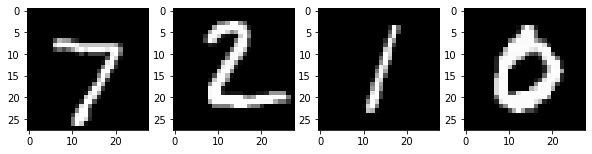

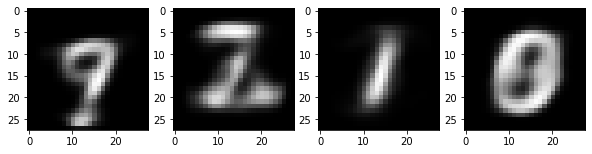

In [39]:
print_decoder_outputs(x_test,decoded_imgs,4)

#### Printing the autoencoder outputs with inputs

In [42]:
gaussian=[[] for i in range(10)] # Storing the outputs of individial neurons to different lists
for image in encoded_imgs:
  i=0
  for neuron_output in image:
    gaussian[i].append(neuron_output)
    i+=1


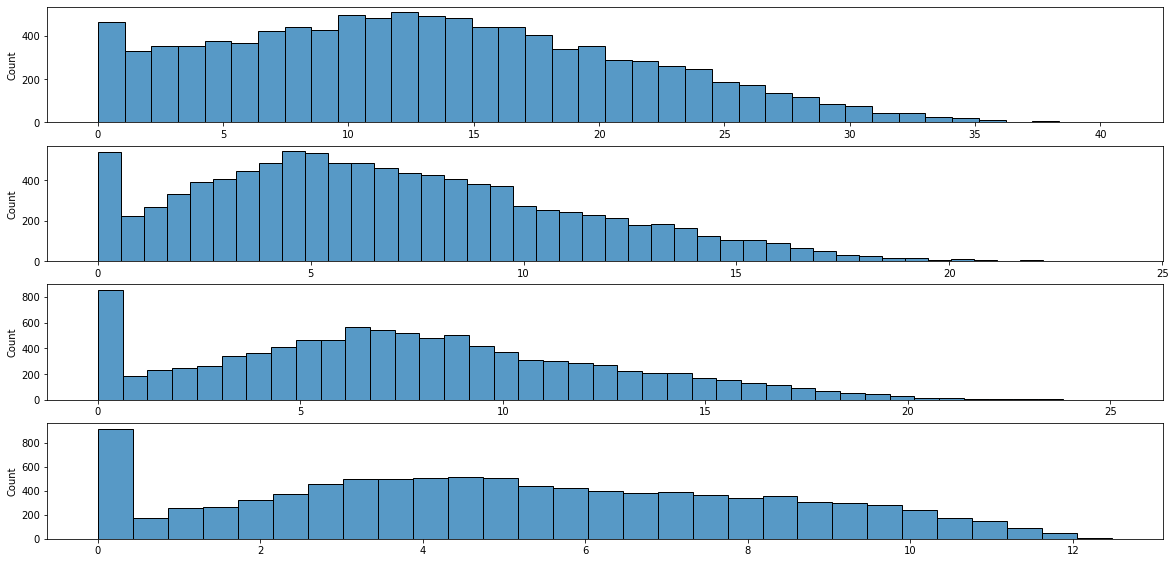

In [45]:
print_distributions(4,gaussian)































































































































































































































































































































































































































#### From the above plot we can see that for the auto encoder which is created, the distirbutions vary for each neurons. Hence it does not have a standard range of values for each neurons, which we can manually feed to generate the output. Hence ,we are creating a variational auto encoder, with standardised outputs, which will help us to feed inputs manually and generate the data